# ML - Sale Prediction from Existing Customer - KNN

### Steps carried to solve the usecase
     1. The problem - > To predict weather the new customer will buy certain product or not
     2. Collecting Data set -> In this usecase, bsed on age and salary, predicting will purchase or will not purchase
     3. Load and summerise the data sets
     4. Segragate the date in to X and y depending on independent and dependent variable,Purchase is dependent variable here
     5. Splitting dataset in to train and test
     6. Feature scalling to mainitain the scare of futute to avaoid higher weightage on single feature, to avoiding biasing
             Can be achieved by Normalization
                                Standardization
     7. Algorithm - KNN
     8. Training -> training the model with preprocessed dataset
     9. Validation -> using confusion matrix
     10. PRediction -> observe hoe the model is performing in new data.
    

## Load the Data set

In [1]:
import pandas as pd # for working with datasets
import numpy as np # for array operations

In [2]:
dataset = pd.read_csv('DigitalAd_dataset.csv')

## Summerize the dataset

In [3]:
print(dataset.shape)

(400, 3)


In [4]:
print(dataset.head(10))

   Age  Salary  Status
0   18   82000       0
1   29   80000       0
2   47   25000       1
3   45   26000       1
4   46   28000       1
5   48   29000       1
6   45   22000       1
7   47   49000       1
8   48   41000       1
9   45   22000       1


## Segragate the date in to X(Input/Indepentent variable) and y(output/Depentent variable)

In [5]:
x = dataset.iloc[:,:-1].values
x

array([[    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],
       [    27,  17000],
       [    33,  51000],
       [    35, 108000],
       [    30,  15000],
       [    28,  84000],
       [    23,  20000],
       [    25,  79000],
       [    27,  54000],
       [    30, 135000],
       [    31,  89000],
       [    24,  32000],
       [    18,  44000],
       [    29,  83000],
       [    35,  23000],


In [6]:
y = dataset.iloc[:,-1].values
y

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,

## Splitting Dataset into Train and Test

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.25,random_state = 0)

## Feature Scaling

    We scale our data to make all the feature contribute to the result
    Fit_transform  - fit method is calculating mean and variance of each of the feature present in our data
    Transform - transform method is transforming all the features using the  respective mean and variance
    

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Finding K Values with least error mean

Text(0, 0.5, 'Mean Error')

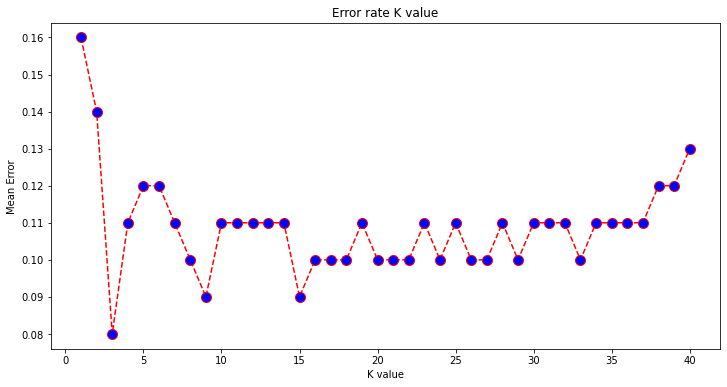

In [11]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# calculating error for K values between 1 and 40

for i in range(1,41):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    pred_i = model.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize =(12,6))
plt.plot(range(1,41),error,color = 'red',linestyle = 'dashed',marker ='o',
        markerfacecolor = 'blue',markersize =10)
plt.title('Error rate K value')
plt.xlabel('K value')
plt.ylabel('Mean Error')


## Training 

In [12]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors= 3, metric= 'minkowski', p = 2)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

## Predicting weather new customer with age and salary will buy or not

In [13]:
age = int(input("Enter the age : "))
sal = int(input("Enter Salary : "))
newCust = [[age,sal]]
result = model.predict(sc.transform(newCust))
                     
print(result)
if result == 1 :
    print("Customer will Buy")
else:
    print("Cusotmer will not Buy")
                        

Enter the age : 45
Enter Salary : 60999
[1]
Customer will Buy


## Prediction for all Test data

In [14]:
y_pred = model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


## Evaluating Model - Confusion matrix 

    Accuracy = TP + TN / TP+TN + FP + FN

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)

print("Confusion matrix")
print(cm)

print("Accuracy of the model : {0}%".format(accuracy_score(y_test,y_pred)*100))

Confusion matrix
[[57  4]
 [ 4 35]]
Accuracy of the model : 92.0%
